<h1>Data visualization Lab</h1>

<h2>Demo: Cómo trabajar con bases de datos</h2>

In [1]:
# Descargando archivo de base de datos
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-11-30 05:36:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  46.4MB/s    in 0.8s    

2024-11-30 05:36:14 (46.4 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



In [2]:
#conectando a la base de datos
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # Abriendo conexion de la base de datos

In [3]:
#importando librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Demo: Cómo ejecutar una consulta SQL</h3>

In [4]:
# Imprima cuantas filas hay en la tabla nombrada 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""
# read_sql_query ejecuta la consulta SQL y devuelve los datos como un dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


<h3>Demo: Cómo listar todas las tablas</h3>

In [5]:
# Imprimir todos los nombres de las tablas en la base de datos.
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# read_sql_query ejecuta la consulta SQL y devuelve los datos como un dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


<h3>Demo: Cómo ejecutar un grupo mediante una consulta</h3>

In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


<h3>Demo: Cómo describir una tabla</h3>

In [7]:
table_name = 'master'  #La tabla que deseas describir

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

<h2>Hands-on Lab</h2>

<h3>Visualizando la distribucion de datos</h3>
<b>Histogramas</b>

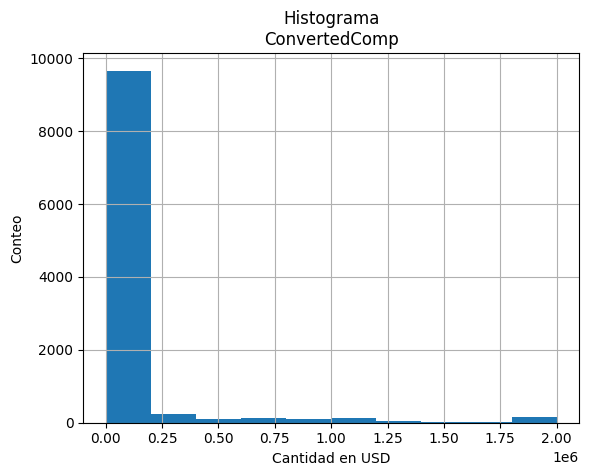

In [8]:
# Grafica de un histograma de la columna "ConvertedComp."
QUERY = """
SELECT * FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.hist(column='ConvertedComp')
plt.title("Histograma\nConvertedComp")
plt.xlabel("Cantidad en USD")
plt.ylabel("Conteo")
plt.show()

<b>Box plot</b>

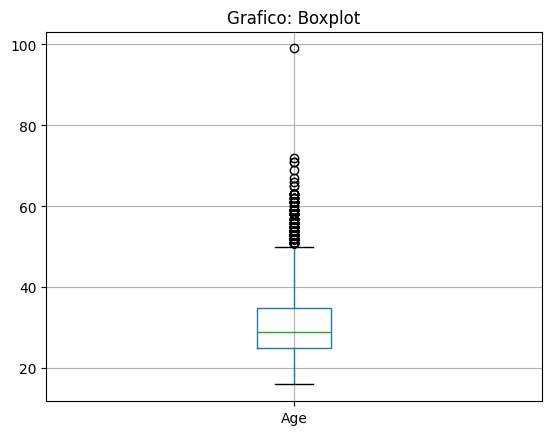

In [9]:
# Graficando un boxplot de la variable "Age"
QUERY = """
SELECT * FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.boxplot(column='Age')
plt.title("Grafico: Boxplot")
plt.show()

<h2>Visualizando la relacion entre los datos</h2>
<b>Scatter plot</b>


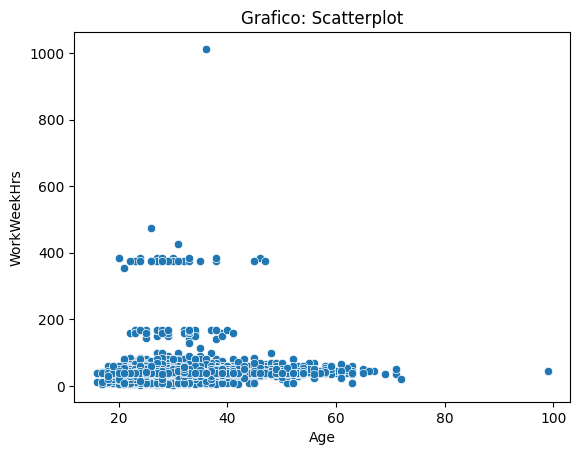

In [10]:
# Create a scatter plot of Age and WorkWeekHrs
QUERY = """
SELECT * FROM master
"""
df = pd.read_sql_query(QUERY,conn)
sns.scatterplot(x='Age', y="WorkWeekHrs", data=df)
plt.title("Grafico: Scatterplot")
plt.show()

<b>Bubble Plots</b>

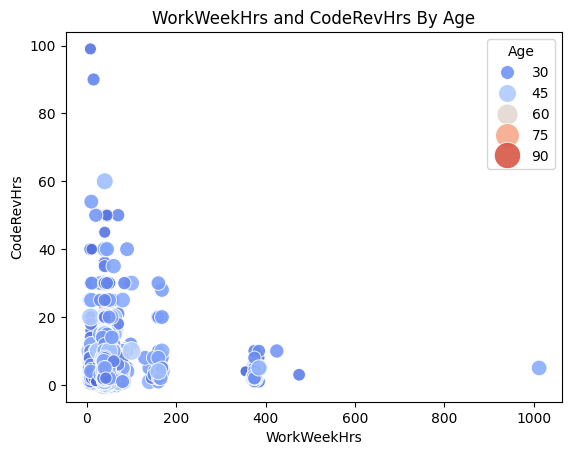

In [11]:
# Crea un grafico  bubble de WorkWeekHrs y CodeRevHrs, usa la columna Age como  bubble size.
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
"""
df1=pd.read_sql_query(QUERY,conn)
sns.scatterplot(data=df1, x='WorkWeekHrs', y='CodeRevHrs', hue='Age', size="Age", alpha=0.9,
                sizes=(40,400), palette="coolwarm")

plt.title('WorkWeekHrs and CodeRevHrs By Age')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.show()

<h3>Visualizando la composicion de los datos</h3>
<p>Pie charts</p>

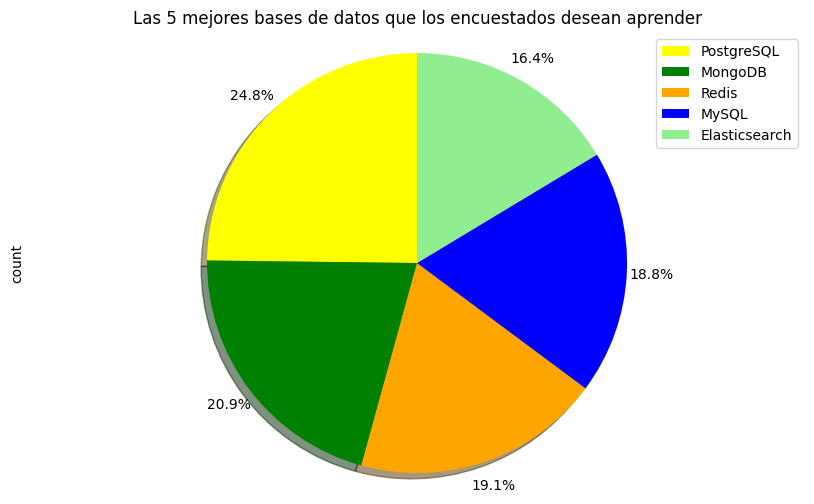

In [31]:
# Cree un piechart de las 5 bases de datos principales que los encuestados desean conocer el próximo año.
#Etiquete el gráfico circular con los nombres de las bases de datos.
#Muestre los porcentajes de cada base de datos en el gráfico circular.

QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as count
from DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count(DatabaseDesireNextYear) DESC LIMIT 5
"""

df=pd.read_sql_query(QUERY,conn)
df.set_index('DatabaseDesireNextYear', inplace=True)

colors_list=['Yellow', 'green', 'orange', 'blue', 'lightgreen', 'pink']

df['count'].plot(kind='pie', figsize=(10,6),
                 autopct='%1.1f%%', labels=None,
                 startangle=90,
                 colors=colors_list,
                 shadow=True,
                 pctdistance=1.12)

plt.legend(labels=df.index, loc='upper right')
plt.title('Las 5 mejores bases de datos que los encuestados desean aprender')
plt.axis("equal")
plt.show()

<p>Stacked Charts</p>

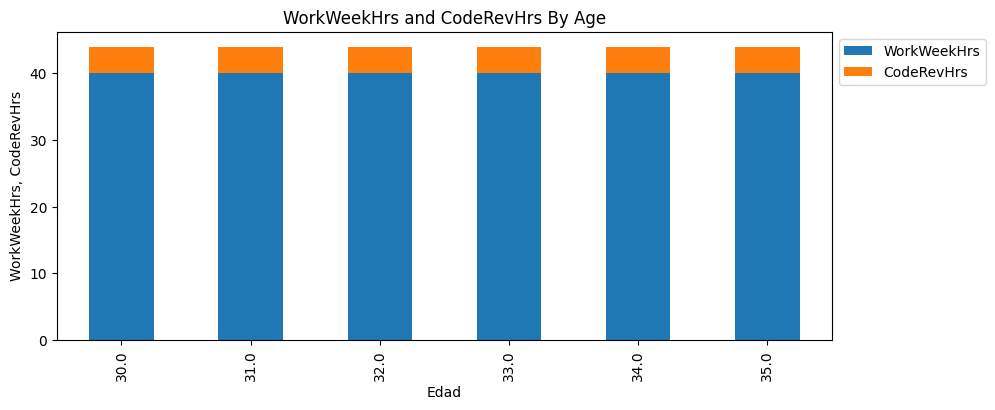

In [59]:
# Cree un gráfico apilado de WorkWeekHrs medianas y las horas CodeRevHrs para el grupo de edad de 30 a 35 años
QUERY = """
SELECT WorkWeekHrs, Age, CodeRevHrs
FROM master
WHERE Age >= 30 AND  Age <= 35;
"""
df=pd.read_sql_query(QUERY, conn)

#indicando el indice como edad
df_grouped = df.groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()

# Crear el gráfico de barras apiladas
df_grouped.plot(kind='bar', stacked=True, figsize=(10,4))

plt.title('WorkWeekHrs and CodeRevHrs By Age')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Edad')
plt.ylabel('WorkWeekHrs, CodeRevHrs')
plt.show()

<h3>Visualización de comparación de datos</h3>
<b>Line chart</b>

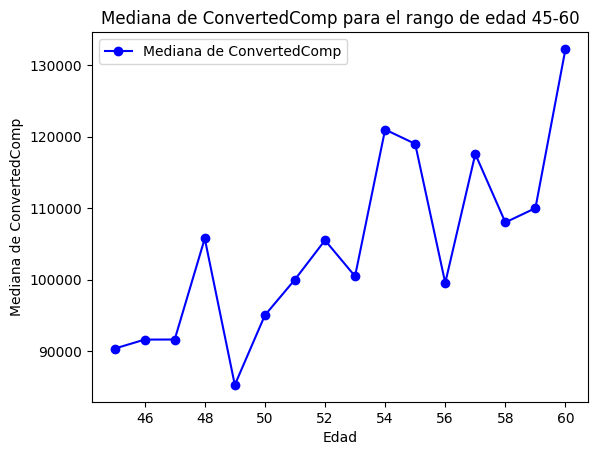

In [75]:
#Grafica la median ConvertedComp para todas las edades de 45 to 60.
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age >= 45 AND Age <=60;
"""
df=pd.read_sql_query(QUERY, conn)

# Agrupar por edad y calcular la mediana de ConvertedComp para cada edad
df_grouped_median = df.groupby('Age')['ConvertedComp'].median()

# Crear el gráfico de líneas para las medianas de ConvertedComp por Edad
plt.plot(df_grouped_median.index, df_grouped_median.values, marker='o', linestyle='-', color='b', label='Mediana de ConvertedComp')

# Etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Mediana de ConvertedComp')
plt.title('Mediana de ConvertedComp para el rango de edad 45-60')
plt.legend()
plt.show()

<b>Bar chart</b>

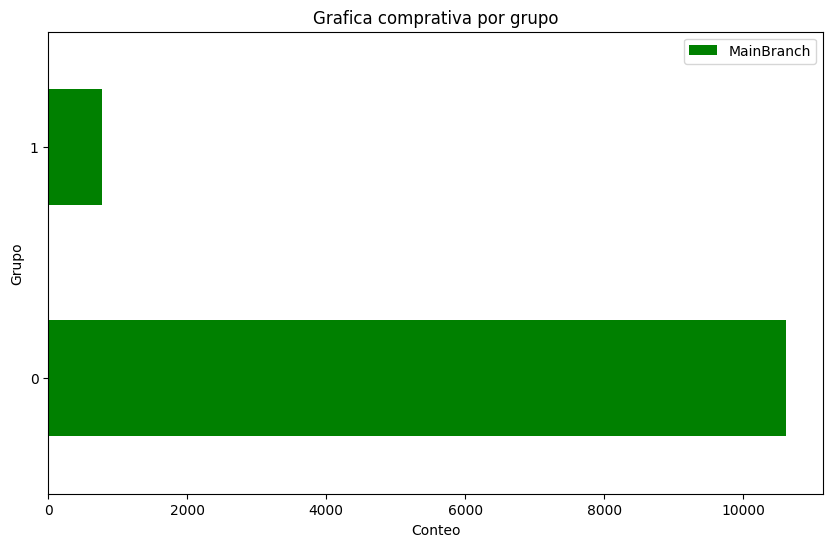

In [86]:
# Crea una bar hart horizontal  usando la columna MainBranch

QUERY = """
SELECT MainBranch, COUNT(*) as MainBranch
FROM master
group by MainBranch
"""
# read_sql_query ejecuta la consulta SQL y devuelve los datos como un dataframe
df=pd.read_sql_query(QUERY, conn)

df.plot(kind='barh', figsize=(10,6), color='green')
plt.title('Grafica comprativa por grupo')
plt.xlabel('Conteo')
plt.ylabel('Grupo')
plt.show()

In [88]:
# Cerrando la conexión
conn.close()